In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [6]:
N=2
layer_list=[2,4,6,8,10]
label_list=['IX','IY','YZ','XZ','IZ']
#label_list=[]
                  #corresponding i_bin in V(X,G,t,m) step of my cpp program
                  #'01' '10' '11'       '01' '10' '11'        '01' '10' '11'        '01' '10' '11'        '01' '10' '11' 
lagend_dir={'IX':['XI','IX','XX'],'XZ':['ZY','XZ','YX'],'IY':['YI','IY','YY'],'IZ':['ZI','IZ','ZZ'],'YZ':['YZ','ZX','XY']}
shots=4000


n_layer=len(layer_list)
d= N**2
l_max= max(layer_list)

In [7]:
f_h=np.array([])
for label in label_list:

    with open("../data/f_{0}Q_{1}layer_{2}shots".format(N,n_layer,shots)+"_"+label+".txt", "r") as f:
        data = f.readlines()
    
    
    line = data[0].split()
    aux_list = []
    for string in line:
        aux_list.append(float(string))
    
    f_h=np.append(f_h,np.array(aux_list))
    
print(np.append(f_h,1))
np.mean(np.append(f_h,1))

[1.0002108  0.90289874 0.90379358 0.90204115 0.90018312 0.90024825
 0.89779238 0.90797829 0.9000334  0.89083153 0.99923749 0.88990058
 0.90733294 1.0003423  0.90729623 1.        ]


0.9256325487499999

# Fitting Data to a Straight Line

Numerical Recipes P781



In [8]:

def straight_line_fit(x,y,sigma_square):
    if type(x)==list:
        x=np.array(x)
    if type(y)==list:
        y=np.array(y)
    if type(sigma_square)==list:
        sigma_square=np.array(sigma_square)
    S=np.sum(1/sigma_square)
    S_x=np.sum(x/sigma_square)
    S_y=np.sum(y/sigma_square)
    S_xx=np.sum(x**2/sigma_square)
    S_xy=np.sum(x*y/sigma_square)
    
    Delta=S*S_xx-S_x**2
    
    a = (S_xx*S_y-S_x*S_xy)/Delta
    b = (S *S_xy-S_x*S_y)/Delta
    
    sigma_a_square=S_xx/Delta
    sigma_b_square=S/Delta
    
    return a,b,sigma_a_square,sigma_b_square

x=np.array([1,2,3])
y=np.array([1,2,3])
sigma_square=np.array([0.5,0.5,0.5])
straight_line_fit(x,y,sigma_square)

(0.0, 1.0, 1.1666666666666667, 0.25)

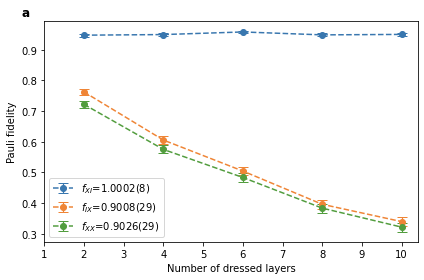

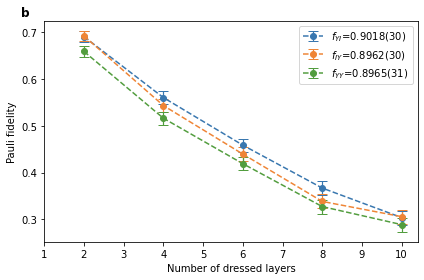

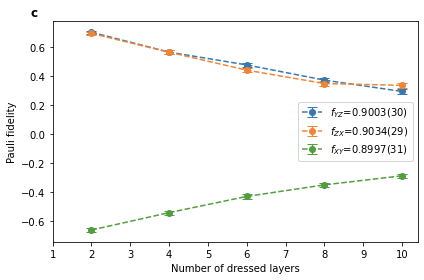

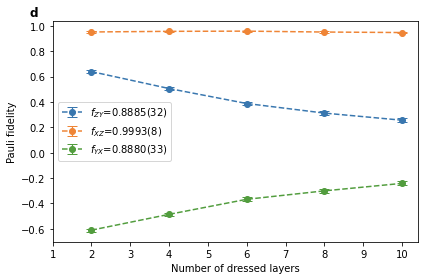

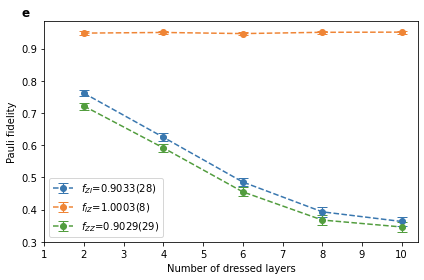

F(CNOT',CNOT)=0.92400±0.00240


In [9]:
eigen=np.array([])
eigen_error=np.array([])

alpha_beta=['a','b','c','d','e','f']
for l_ind,label in enumerate(label_list):

    with open("../data/eigenvalue_{0}Q_{1}layer_{2}shots".format(N,n_layer,shots)+"_"+label+".txt", "r") as f:
        data = f.readlines()



    f_p_l=[]

    # read the operator and probabilities list from txt file 
    for ind,lines in enumerate(data):
        lines = lines.split()

        aux_list = []
        for string in lines:
            aux_list.append(float(string))
        f_p_l.append(aux_list)

    
    f_p_l=np.array(f_p_l)
    n_Paulis=int(len(f_p_l)/2)
    
    fig,ax = plt.subplots(figsize = (6,4),tight_layout=True)




    m_list = np.array(layer_list)

    f_p=np.array([])
    f_p_error=np.array([])
    
    lagend_list=lagend_dir[label]
    color_list = ['#3977AF','#EF8536','#529D3E','#C53932','#8D6BB8','#85584E','#D57EBE','#7F7F7F ']
    for i in range(0,n_Paulis):

        
        #ax.plot(m_list,f_p_l[i],'o--',label=r"$f_{"+lagend_list[i]+"}$",color=color_list[i])
        v_h=f_p_l[i][0]
        f_p_l[i]=f_p_l[i]/v_h
        
        # Data fitting, the error input to the log diagram and recover see the Note
        a,b,sigma_a_square,sigma_b_square = straight_line_fit(m_list,np.log(f_p_l[i]),(f_p_l[i+n_Paulis]/f_p_l[i])**2)
        f_p=np.append(f_p,np.e**b)
        f_p_error=np.append(f_p_error,np.sqrt(sigma_b_square)*(np.e**b))
        
        f_p_l[i]=f_p_l[i]*v_h
        ax.errorbar(m_list,f_p_l[i],yerr = f_p_l[i+n_Paulis],fmt = 'o--',color = color_list[i],\
            elinewidth = 1.2,capsize = 5,label=r"$f_{"+lagend_list[i]+"}$"+"={0:.4f}({1:.0f})".format(f_p[i],f_p_error[i]*10000))
    
    eigen = np.append(eigen,f_p)
    eigen_error = np.append(eigen_error,f_p_error)
    

    ax.legend(loc='best')

    ticks = np.arange(1,l_max+1,1)
    tickla = [f'{tick:d}' for tick in ticks]


    ax.xaxis.set_ticks(ticks)
    ax.xaxis.set_ticklabels(tickla)

    ax.set_ylabel("Pauli fidelity")
    ax.set_xlabel("Number of dressed layers")
    #ax.set_title(label)

    plt.text(-0.04,1+0.005,alpha_beta[l_ind],horizontalalignment='right', verticalalignment='bottom',fontsize = 'large',fontweight='bold',transform = ax.transAxes)

    plt.savefig("./pictures/Q2_character_RB_{0}Q_{1}layer_{2}shots".format(N,n_layer,shots)+"_"+label+".pdf")

    plt.show()

eigen=np.append(np.array([1]),eigen)
result = np.mean(eigen) #f_I is always 1

eigen_error=np.append(np.array([0]),eigen_error)
result_error =  np.mean(eigen_error) #f_I has error 0

print("F(CNOT',CNOT)={0:.5f}±{1:.5f}".format(result,result_error))
      
      
      
      

In [69]:
WHT_2Q=np.array([
    #1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1,-1, 1,-1,-1,-1, 1,-1, 1,-1,-1, 1,-1],
    [1, 1, 1, 1, 1,-1,-1,-1, 1,-1,-1,-1, 1, 1,-1,-1],
    [1, 1, 1, 1,-1,-1, 1, 1,-1,-1, 1,-1,-1,-1,-1, 1],
    
    [1,-1, 1,-1, 1, 1, 1, 1,-1,-1,-1,-1, 1,-1, 1,-1],
    [1, 1,-1,-1, 1, 1, 1,-1,-1, 1, 1,-1,-1, 1,-1,-1],
    [1,-1,-1, 1, 1, 1, 1,-1, 1,-1,-1, 1,-1,-1,-1, 1],
    
    [1,-1,-1, 1, 1,-1,-1, 1, 1, 1, 1,-1,-1,-1, 1,-1],
    [1,-1, 1,-1,-1,-1, 1, 1, 1, 1,-1, 1,-1, 1,-1,-1],
    [1, 1,-1,-1,-1, 1,-1, 1, 1, 1,-1,-1, 1,-1,-1, 1],
    #1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16
    [1,-1,-1, 1,-1, 1,-1, 1,-1,-1, 1, 1, 1, 1,-1,-1],
    [1, 1,-1,-1,-1,-1, 1,-1, 1,-1, 1, 1, 1,-1, 1,-1],
    [1,-1, 1,-1, 1,-1,-1,-1,-1, 1, 1, 1, 1,-1,-1, 1],
    
    [1,-1, 1,-1,-1, 1,-1,-1, 1,-1, 1,-1,-1, 1, 1, 1],
    [1, 1,-1,-1, 1,-1,-1, 1,-1,-1,-1, 1,-1, 1, 1, 1],
    [1,-1,-1, 1,-1,-1, 1,-1,-1, 1,-1,-1, 1, 1, 1, 1],
    
])/d**2



Pauli_list=['II']

for value in lagend_dir.values():
    for ele in value:
        Pauli_list.append(ele)
        
Pauli_error_rate=np.dot(WHT_2Q,eigen)
Pauli_error_rate_error=np.abs(np.dot(WHT_2Q,eigen_error))
print("Pauli error rate:",Pauli_error_rate)
print("Pauli error rate error :",Pauli_error_rate_error)

print("\ncorrespond to Pauli probability:")
print(Pauli_list)

p=0.1

th_Pauli_error_rate=[1-0.75*p, p*0.25,0,0,0,0,0,0,0,0,0,p*0.25,0,0,p*0.25,0]
print("theoretical Pauli error rate:",th_Pauli_error_rate)
# XI, XZ, IZ

Pauli error rate: [ 9.25434878e-01  2.48891282e-02 -2.84159316e-04 -4.65513346e-04
 -6.62867357e-06 -1.38947867e-04  4.66937337e-04  2.27816695e-04
  8.66626160e-04  7.04643129e-04 -4.06467764e-04  2.50248642e-02
 -6.69004120e-04  1.46474866e-04  2.46003878e-02 -3.91035513e-04]
Pauli error rate error : [1.07272651e-03 2.78183845e-04 3.33932131e-05 2.69839653e-05
 1.65182687e-05 1.45455802e-05 2.74650576e-05 1.51976534e-05
 3.29616819e-05 1.40766685e-05 1.57307563e-05 2.50873912e-04
 1.13063981e-05 3.57620407e-05 2.79173411e-04 2.05540582e-05]

correspond to Pauli probability:
['II', 'XI', 'IX', 'XX', 'ZY', 'XZ', 'YX', 'YI', 'IY', 'YY', 'ZI', 'IZ', 'ZZ', 'YZ', 'ZX', 'XY']
theoretical Pauli error rate: [0.925, 0.025, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.025, 0, 0, 0.025, 0]


# 用冒泡排序对Pauli error rate 进行排序

In [70]:


n = len(Pauli_error_rate)

# 遍历所有数组元素
for i in range(n):

    # Last i elements are already in place
    for j in range(0, n-i-1):

        if Pauli_error_rate[j] <=Pauli_error_rate[j+1] :
            #Python的交换也太暴力了
            Pauli_error_rate[j], Pauli_error_rate[j+1] = Pauli_error_rate[j+1], Pauli_error_rate[j]
            th_Pauli_error_rate[j], th_Pauli_error_rate[j+1] = th_Pauli_error_rate[j+1], th_Pauli_error_rate[j]
            Pauli_error_rate_error[j], Pauli_error_rate_error[j+1] = Pauli_error_rate_error[j+1], Pauli_error_rate_error[j]
            Pauli_list[j], Pauli_list[j+1] = Pauli_list[j+1], Pauli_list[j]
            
 


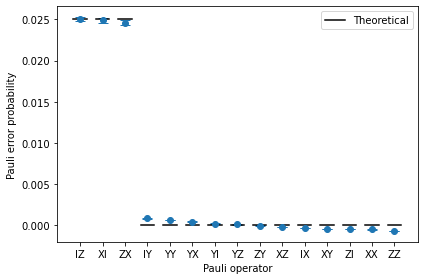

In [72]:
import matplotlib.ticker as ticker

fig,ax = plt.subplots(figsize = (6,4),tight_layout=True)

x=np.linspace(1,15,15)


ax.xaxis.set_ticks(x)
ax.xaxis.set_ticklabels(Pauli_list[1:])

ax.errorbar(x,Pauli_error_rate[1:],yerr = Pauli_error_rate_error[1:],fmt = 'o',\
            elinewidth = 1.2,capsize = 5)
    

    
width=0.3
for i in range(len(x)):
    if i ==0:
        ax.plot([x[i]-width,x[i]+width],[th_Pauli_error_rate[1:][i],th_Pauli_error_rate[1:][i]],color='black',label="Theoretical")
    else:
        ax.plot([x[i]-width,x[i]+width],[th_Pauli_error_rate[1:][i],th_Pauli_error_rate[1:][i]],color='black')
ax.legend(loc='best')
#ax.set_title("Pauli error rates of CNOT gate")
ax.set_xlabel("Pauli operator")
ax.set_ylabel("Pauli error probability")

plt.savefig("./pictures/Q"+str(N)+"Pauli_error_probability_CNOT.pdf")
plt.show()



